# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import gmaps
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
from scipy import stats

## Generate Cities List

In [2]:
#Set ranges from which to extract random latitudes and longitudes
lat_rng = [-90, 90]
lng_rng = [-180, 180]

cities = []

lat = np.random.uniform(-90, 90, 1500)
lng = np.random.uniform(-180, 180, 1500)
coordinates = list(zip(lat, lng))

for coord in coordinates:
    (lat, lng) = coord
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

605

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df

,city
0,mys shmidta
1,qaanaaq
2,isla mujeres
3,barentsburg
4,puerto ayora
...,...
600,arica
601,souillac
602,katherine
603,tanggu


In [4]:
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mys shmidta,,,,,,,,
1,qaanaaq,,,,,,,,
2,isla mujeres,,,,,,,,
3,barentsburg,,,,,,,,
4,puerto ayora,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval")
print("___________________")

url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = url + "appid=" + api_key + "&q="

for index, row in cities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    print(f"Processing record for city number {index}: {city}")
    
    try:      
        cities_df.loc[index, "Latitude"] = response["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        
        #print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found... Continue search.")

Beginning Data Retrieval
___________________
Processing record for city number 0: mys shmidta
City not found... Continue search.
Processing record for city number 1: qaanaaq
Processing record for city number 2: isla mujeres
Processing record for city number 3: barentsburg
City not found... Continue search.
Processing record for city number 4: puerto ayora
Processing record for city number 5: hasaki
Processing record for city number 6: provideniya
Processing record for city number 7: tuktoyaktuk
Processing record for city number 8: ushuaia
Processing record for city number 9: gambela
Processing record for city number 10: port alfred
Processing record for city number 11: linxia
Processing record for city number 12: sulphur
Processing record for city number 13: vaini
Processing record for city number 14: solovetskiy
City not found... Continue search.
Processing record for city number 15: bonavista
Processing record for city number 16: albany
Processing record for city number 17: rikitea
P

Processing record for city number 159: tyukhtet
Processing record for city number 160: carnarvon
Processing record for city number 161: cayenne
Processing record for city number 162: biritiba-mirim
Processing record for city number 163: port blair
Processing record for city number 164: bonfim
Processing record for city number 165: karauzyak
City not found... Continue search.
Processing record for city number 166: torbay
Processing record for city number 167: sentyabrskiy
City not found... Continue search.
Processing record for city number 168: puerto del rosario
Processing record for city number 169: suesca
Processing record for city number 170: vestmannaeyjar
Processing record for city number 171: ahipara
Processing record for city number 172: mbanza-ngungu
Processing record for city number 173: salinopolis
Processing record for city number 174: jiwani
Processing record for city number 175: temir
Processing record for city number 176: bengkulu
Processing record for city number 177: la

Processing record for city number 321: jacareacanga
Processing record for city number 322: vilhena
Processing record for city number 323: mendahara
City not found... Continue search.
Processing record for city number 324: gisborne
Processing record for city number 325: ames
Processing record for city number 326: labrea
Processing record for city number 327: deputatskiy
Processing record for city number 328: urumqi
Processing record for city number 329: bani
Processing record for city number 330: faanui
Processing record for city number 331: acarau
Processing record for city number 332: babaeski
Processing record for city number 333: pavilosta
Processing record for city number 334: urdzhar
City not found... Continue search.
Processing record for city number 335: mackay
Processing record for city number 336: ebeltoft
Processing record for city number 337: vanimo
Processing record for city number 338: manta
Processing record for city number 339: nhulunbuy
Processing record for city number

Processing record for city number 479: port hardy
Processing record for city number 480: ambon
Processing record for city number 481: kitui
Processing record for city number 482: susangerd
Processing record for city number 483: touros
Processing record for city number 484: darhan
Processing record for city number 485: vardo
Processing record for city number 486: ramotswa
Processing record for city number 487: aklavik
Processing record for city number 488: karratha
Processing record for city number 489: namatanai
Processing record for city number 490: hamilton
Processing record for city number 491: sebezh
Processing record for city number 492: takoradi
Processing record for city number 493: ahuimanu
Processing record for city number 494: palmas de monte alto
Processing record for city number 495: lufilufi
Processing record for city number 496: edson
Processing record for city number 497: yamada
Processing record for city number 498: longyearbyen
Processing record for city number 499: pa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_csv = cities_df.to_csv(r"cities.csv")
cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mys shmidta,,,,,,,,
1,qaanaaq,77.484,-69.3632,280.61,64,39,0.87,GL,1626990007
2,isla mujeres,21.2311,-86.731,305.18,69,0,3.51,MX,1626990008
3,barentsburg,,,,,,,,
4,puerto ayora,-0.7393,-90.3518,300.13,87,98,4.47,EC,1626990008
...,...,...,...,...,...,...,...,...,...
600,arica,-18.475,-70.3042,289.28,72,90,5.14,CL,1626989972
601,souillac,-20.5167,57.5167,294.46,77,20,5.14,MU,1626990157
602,katherine,-14.4667,132.267,285.33,76,35,2.06,AU,1626990157
603,tanggu,39.0211,117.647,299.13,76,100,1.45,CN,1626990158


In [9]:
#cities_df["Latitude"] = pd.to_numeric(cities_df['Latitude'], errors='coerce')
#cities_df["Longitude"] = pd.to_numeric(cities_df['Longitude'], errors='coerce')
cities_df["Humidity"] = pd.to_numeric(cities_df['Humidity'], errors='coerce')
#cities_df["Max Temp"] = pd.to_numeric(cities_df['Max Temp'], errors='coerce')
#cities_df["Cloudiness"] = pd.to_numeric(cities_df['Cloudiness'], errors='coerce')
#cities_df["Wind Speed"] = pd.to_numeric(cities_df['Wind Speed'], errors='coerce')
cities_df.dtypes

city           object
Latitude       object
Longitude      object
Max Temp       object
Humidity      float64
Cloudiness     object
Wind Speed     object
Country        object
Date           object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#clean data to remove cities that have missing data & reset index
clean_cities_df = cities_df.dropna().reset_index(drop=True)
clean_cities_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.484,-69.3632,280.61,64.0,39,0.87,GL,1626990007
1,isla mujeres,21.2311,-86.731,305.18,69.0,0,3.51,MX,1626990008
2,puerto ayora,-0.7393,-90.3518,300.13,87.0,98,4.47,EC,1626990008
3,hasaki,35.7333,140.833,298.31,76.0,31,2.02,JP,1626990008
4,provideniya,64.3833,-173.3,280.21,76.0,75,5,RU,1626990009
...,...,...,...,...,...,...,...,...,...
548,arica,-18.475,-70.3042,289.28,72.0,90,5.14,CL,1626989972
549,souillac,-20.5167,57.5167,294.46,77.0,20,5.14,MU,1626990157
550,katherine,-14.4667,132.267,285.33,76.0,35,2.06,AU,1626990157
551,tanggu,39.0211,117.647,299.13,76.0,100,1.45,CN,1626990158


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

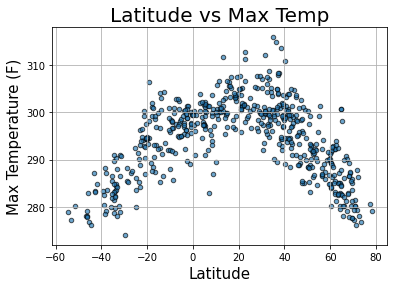

In [12]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Max Temp", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.show()

## Latitude vs. Humidity Plot

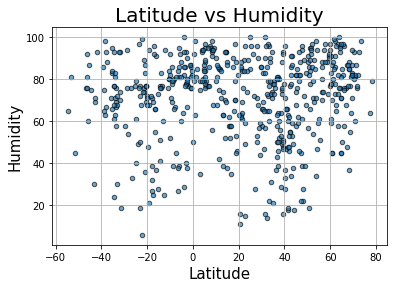

In [13]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Humidity', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Humidity", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity", size = 15)
plt.show()

## Latitude vs. Cloudiness Plot

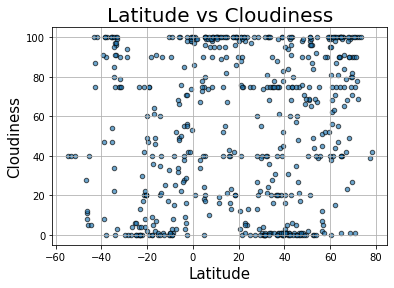

In [14]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Cloudiness', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Cloudiness", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness", size = 15)
plt.show()

## Latitude vs. Wind Speed Plot

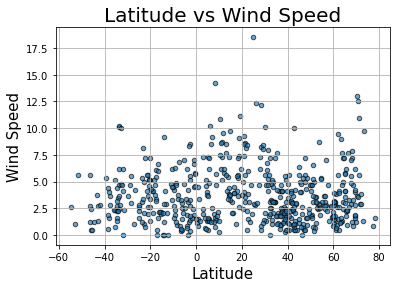

In [15]:
clean_cities_df.plot.scatter(x ='Latitude', y ='Wind Speed', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Wind Speed", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Wind Speed", size = 15)
plt.show()

## Linear Regression

In [16]:
nor_hem_df = clean_cities_df[clean_cities_df["Latitude"] >= 0]
nor_hem_df

,city,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.484,-69.3632,280.61,64.0,39,0.87,GL,1626990007
1,isla mujeres,21.2311,-86.731,305.18,69.0,0,3.51,MX,1626990008
3,hasaki,35.7333,140.833,298.31,76.0,31,2.02,JP,1626990008
4,provideniya,64.3833,-173.3,280.21,76.0,75,5,RU,1626990009
5,tuktoyaktuk,69.4541,-133.037,285.15,87.0,90,6.17,CA,1626990009
...,...,...,...,...,...,...,...,...,...
543,obihiro,42.9172,143.204,293.67,91.0,100,1.03,JP,1626990156
544,stettler,52.3168,-112.719,291.71,54.0,49,3.11,CA,1626990156
547,gao,16.6362,1.637,307.41,35.0,23,3.97,ML,1626990157
551,tanggu,39.0211,117.647,299.13,76.0,100,1.45,CN,1626990158


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
type(nor_hem_df["Max Temp"])

pandas.core.series.Series

In [24]:
nor_hem_df["Latitude"]

0       77.484
1      21.2311
3      35.7333
4      64.3833
5      69.4541
        ...   
543    42.9172
544    52.3168
547    16.6362
551    39.0211
552       35.5
Name: Latitude, Length: 383, dtype: object

In [33]:
test1 = nor_hem_df["Max Temp"].tolist()
test2 = nor_hem_df["Latitude"].tolist()

In [34]:
test2

[77.484,
 21.2311,
 35.7333,
 64.3833,
 69.4541,
 8.25,
 35.6003,
 30.2366,
 48.6499,
 42.6001,
 43.3236,
 63.7506,
 18.6853,
 68.75,
 65.8522,
 60.9167,
 14.2,
 3.0707,
 39.3114,
 43.6475,
 30.6945,
 62.456,
 32.3502,
 42.097,
 30.4833,
 47.8043,
 11.2408,
 64.1835,
 38.5167,
 41.3712,
 22.0752,
 5.8933,
 1,
 40.0833,
 25.5198,
 38.7153,
 15.7432,
 52.2037,
 60.4667,
 5.4899,
 28.017,
 45.0917,
 64.2539,
 19.7297,
 71.6872,
 39.2667,
 71.9167,
 22.2855,
 50.6789,
 41.6096,
 69.7008,
 70.4692,
 60.1496,
 5.5577,
 58.8053,
 69.4865,
 64.8378,
 55.7435,
 39.05,
 64.2457,
 20.5022,
 0.6,
 14.3122,
 36.8886,
 35.1333,
 72.7868,
 19.1059,
 14.8961,
 8.4054,
 40.6334,
 40.5982,
 61.95,
 70.6333,
 71.9667,
 16.0678,
 31.61,
 28.1667,
 8.4509,
 46.5389,
 59.3833,
 34.6667,
 63.8424,
 10.5669,
 8.5667,
 4.375,
 32.6667,
 59.7035,
 44.0582,
 56.5389,
 4.9333,
 11.6667,
 3.0833,
 47.6666,
 28.5004,
 5.1029,
 63.4427,
 25.05,
 49.1414,
 65.5833,
 67.4667,
 5.1033,
 47.0529,
 38.421,
 33.5928,
 37.

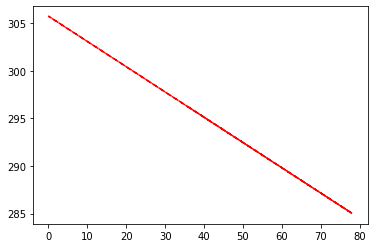

In [35]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(test2, test1)
vc_fit = vc_slope * nor_hem_df["Latitude"] + vc_int

plt.plot(nor_hem_df["Latitude"],vc_fit,"--", color='red')

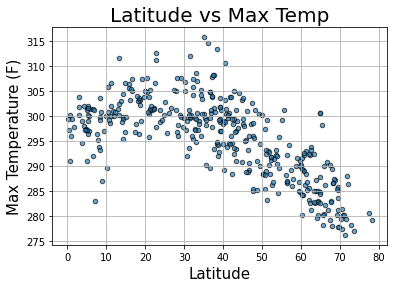

In [18]:
nor_hem_df.plot.scatter(x ='Latitude', y ='Max Temp', marker = "o", 
               facecolors = "blue", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("Latitude vs Max Temp", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


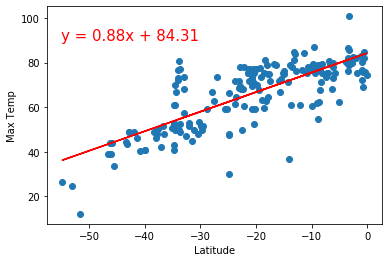

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


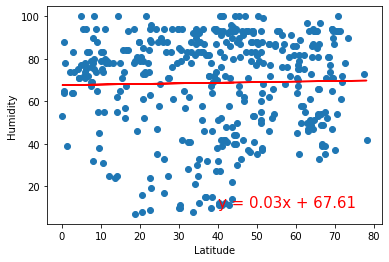

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


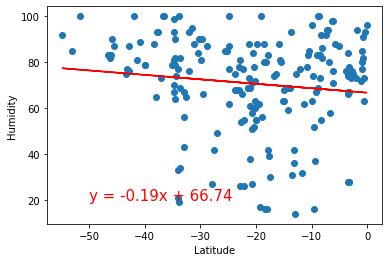

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


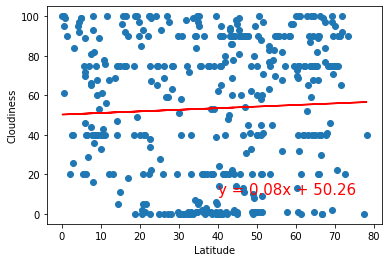

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


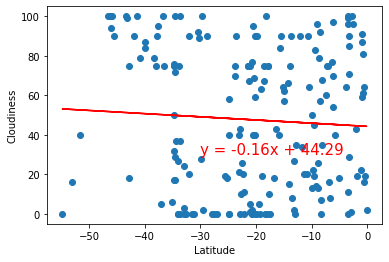

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


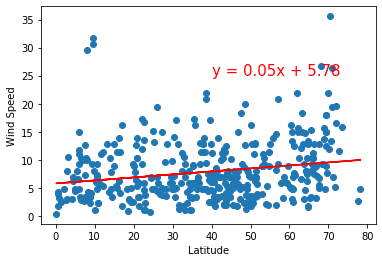

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


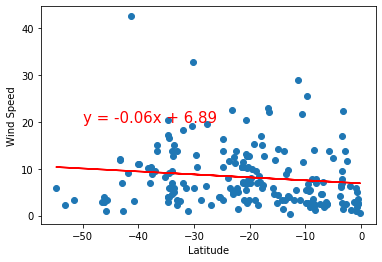